<a href="https://colab.research.google.com/github/eehcl/Final-Team6/blob/main/Rank100_%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('/content/combined_dataset.csv')
# 원본 데이터

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11446 non-null  int64  
 1   listing_url                                   11446 non-null  object 
 2   scrape_id                                     11446 non-null  int64  
 3   last_scraped                                  11446 non-null  object 
 4   source                                        11446 non-null  object 
 5   name                                          11446 non-null  object 
 6   description                                   9276 non-null   object 
 7   neighborhood_overview                         5663 non-null   object 
 8   picture_url                                   11446 non-null  object 
 9   host_id                                       11446 non-null 

In [5]:
# host_id별 숙소개수 집계
host_counts = df["host_id"].value_counts().reset_index()

# 컬럼명 정리
host_counts.columns = ["host_id", "숙소개수"]

# 순위 붙이기
host_counts["순위"] = host_counts["숙소개수"].rank(method="dense", ascending=False).astype(int)

# 순위순으로 정렬
host_counts = host_counts.sort_values(by="순위")

print(host_counts.head(10))
# 상위 10개만

      host_id  숙소개수  순위
0      227945    98   1
1     5463516    98   1
2    52431987    96   2
3    48640172    87   3
4     2420885    84   4
5     8087351    81   5
6   199610462    79   6
7        5282    77   7
8   105741472    75   8
10    3736234    72   9


In [8]:
df1 = pd.read_csv('/content/top100_all_columns_comparison (1).csv')
# 랭크 100위 (원태님이 전처리해주신 데이터)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rank                                          100 non-null    int64  
 1   host_id                                       100 non-null    int64  
 2   id                                            100 non-null    float64
 3   listing_url                                   100 non-null    object 
 4   scrape_id                                     100 non-null    float64
 5   last_scraped                                  100 non-null    object 
 6   source                                        100 non-null    object 
 7   name                                          100 non-null    object 
 8   description                                   98 non-null     object 
 9   neighborhood_overview                         80 non-null     obje

In [10]:
df['price']

,price
0,"$3,955.00"
1,"$2,955.00"
2,"$3,223.00"
3,"$6,741.00"
4,"$2,763.00"
...,...
11441,$523.00
11442,"$2,357.00"
11443,"$1,120.00"
11444,"$1,141.00"


In [11]:
df['number_of_reviews']

,number_of_reviews
0,30
1,117
2,358
3,16
4,333
...,...
11441,0
11442,0
11443,0
11444,0


In [15]:
# 데이터시각화를 위한 폰트설정
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.tt f', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                           # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


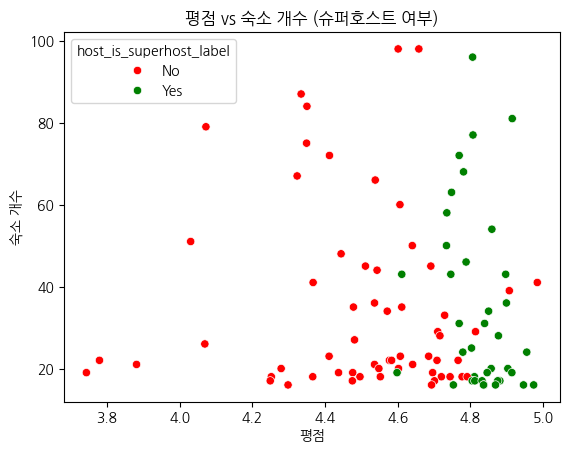

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df1['host_is_superhost_label'] = df1['host_is_superhost'].map({'t': 'Yes', 'f': 'No'})

sns.scatterplot(
    data=df1,
    x="review_scores_rating",
    y="count",
    hue="host_is_superhost_label",  # 이제 Yes/No
    palette={"Yes": "green", "No": "red"}
)
plt.xlabel("평점")
plt.ylabel("숙소 개수")
plt.title("평점 vs 숙소 개수 (슈퍼호스트 여부)")
plt.show()